In [80]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
order_df=pd.read_csv("./data/Orders.csv")

In [3]:
order_df.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [4]:
order_df.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority'],
      dtype='object')

In [6]:
#remove , and $ from Profit and Sales
order_df.loc[:,'Profit']=order_df.loc[:,'Profit'].str.replace("$","").str.replace(",","")
order_df.loc[:,'Sales']=order_df.loc[:,'Sales'].str.replace("$","").str.replace(",","")

0          62.15
1        -288.77
2         919.97
3         -96.54
4         311.52
5         763.28
6         564.84
7         996.48
8          54.71
9           5.48
10          4.66
11        647.55
12       1151.40
13        622.02
14       1036.08
15        186.95
16         -2.52
17       3979.08
18         28.40
19        818.28
20        276.84
21          4.86
22        358.02
23       1898.40
24        445.52
25        526.50
26        720.36
27       1364.24
28        121.44
29        582.36
          ...   
51260      -1.11
51261      51.50
51262      16.01
51263       3.28
51264       8.86
51265     124.78
51266     -18.83
51267      16.59
51268       2.16
51269      12.00
51270       5.88
51271      22.05
51272       0.56
51273       0.04
51274       3.72
51275     -21.17
51276       7.38
51277     -49.57
51278      12.60
51279      -6.46
51280       5.00
51281       9.20
51282      19.95
51283       1.86
51284       8.00
51285       4.50
51286       3.34
51287       2.

In [7]:
#change Date to numeric type
order_df[['Profit','Sales']] = order_df[['Profit','Sales']].apply(pd.to_numeric)

In [9]:
#change date to date type
order_df['Order.Date']=pd.to_datetime(order_df['Order.Date'],format="%m/%d/%y")

In [10]:
#add two columns - season and month
order_df['month']=[i.month for i in order_df["Order.Date"]]
temp=order_df['month'].replace([1,2,12],'Winter').replace([3,4,5],'Spring').replace([6,7,8],'Summer').replace([9,10,11],'Autumn')
order_df['season']=temp

In [11]:
order_df.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority', 'month', 'season'],
      dtype='object')

In [72]:
#question 2.1
seasonal_df=order_df[['season','Quantity']]
seasonal_df=seasonal_df.groupby('season')['Quantity'].sum()
seasonal_df

season
Autumn    59161
Spring    34052
Summer    46651
Winter    38448
Name: Quantity, dtype: int64

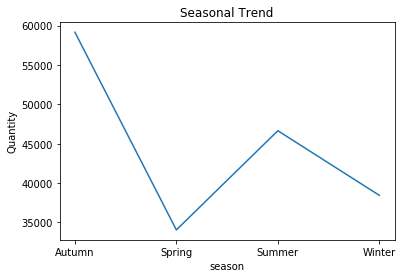

In [13]:
plt.plot(seasonal_df)
plt.title('Seasonal Trend')
plt.xlabel('season')
plt.ylabel('Quantity')
plt.show()

In [14]:
#Question 2.2
inv_df=order_df[['Sub.Category','season','Quantity']]
inv_df=inv_df.groupby(['Sub.Category','season']).agg({'Quantity':['sum']})
inv_df=inv_df.stack().reset_index()
inv_df.drop('level_2',axis=1,inplace=True)

In [15]:
inv_df.columns

Index(['Sub.Category', 'season', 'Quantity'], dtype='object')

In [21]:
# the bar location
ind = np.arange(0,34,2) #for 17 Sub Categories
width=0.2

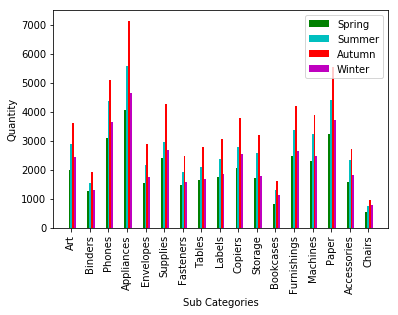

In [83]:
#bar(left, height, width, color, align, yerr)
Spring=list(inv_df[inv_df['season']=='Spring'].Quantity)
Summer=list(inv_df[inv_df['season']=='Summer'].Quantity)
Autumn=list(inv_df[inv_df['season']=='Autumn'].Quantity)
Winter=list(inv_df[inv_df['season']=='Winter'].Quantity)
plt.bar(ind,Spring,width,color='g',label='Spring')
plt.bar(ind+width,Summer,width,color='c',label='Summer')
plt.bar(ind+2*width,Autumn,width,color='r',label='Autumn')
plt.bar(ind+3*width,Winter,width,color='m',label='Winter')
plt.legend(loc="upper right")
plt.xlabel('Sub Categories')
plt.ylabel('Quantity')
plt.xticks(ind + width, set(inv_df['Sub.Category']),rotation=90)
plt.show()

In [38]:
#Q3
#read returns csv file
return_df=pd.read_csv("./data/Returns.csv")

In [39]:
return_df.columns=return_df.columns.str.replace(' ','.')
return_df.columns

Index(['Returned', 'Order.ID', 'Region'], dtype='object')

In [50]:
#join return and order tables
join_df=order_df.merge(return_df,how="inner",on="Order.ID",suffixes=['_O', '_R'])

In [52]:
join_df.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region_O', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority', 'month', 'season',
       'Returned', 'Region_R'],
      dtype='object')

In [144]:
join_df['year']=[i.year for i in join_df["Order.Date"]]
profit_df=join_df[['Profit','year']]
gbprofit=profit_df.groupby('year')['Profit'].sum()
gbprofit=gbprofit_df.stack().reset_index()
gbprofit.drop('level_1',axis=1,inplace=True)
gbprofit.rename(columns={0:'Profit'},inplace=True)
gbprofit['Profit']=gbprofit['Profit'].astype(np.int)

In [148]:
gbprofit

,year,Profit
0,2012,17477
1,2013,9269
2,2014,17510
3,2015,17112


Text(0,0.5,'Profit')

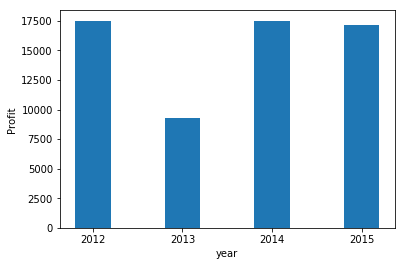

In [241]:
position=np.arange(4)
plt.bar(position,gbprofit['Profit'],0.4)
plt.xticks(position, gbprofit['year'])
plt.xlabel('year')
plt.ylabel('Profit')

In [194]:
#Q3.2
buytime=pd.DataFrame(order_df.groupby('Customer.ID')['Customer.ID'].count())
buytime=buytime.stack().reset_index()
buytime.drop('level_1',axis=1,inplace=True)
buytime.rename(columns={0:'count'},inplace=True)
mtonce=buytime[buytime['count']>1]
mtfive=buytime[buytime['count']>5]
print ("%d customer puchased more than once" % len(mtonce))
print ("%d costomer puchased more than five times" % len(mtfive))

11350 customer puchased more than once
2247 costomer puchased more than five times


In [250]:
#Q3.3
return_region=pd.DataFrame(return_df.groupby('Region')['Order.ID'].count())
return_region=return_region.stack().reset_index()
return_region.drop('level_1',axis=1,inplace=True)
return_region.rename(columns={0:'count'},inplace=True)
return_region['count']=return_region['count'].astype('int')
rtop10=return_region.sort_values(by=['count'],axis=0,ascending=False).head(10)

Text(0,0.5,'Region')

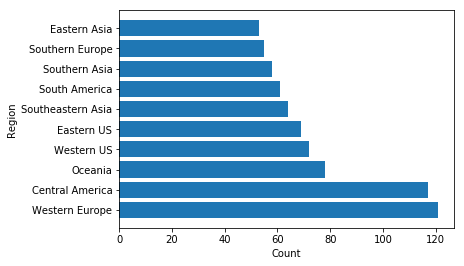

In [251]:
x3=rtop10['Region']
y3=rtop10['count']
plt.barh(x3,y3)
plt.xlabel('Count')
plt.ylabel('Region')
plt.show()

In [252]:
#Q3.4
cat_return=pd.DataFrame(join_df.groupby('Sub.Category')['Order.ID'].count())
cat_return=cat_return.stack().reset_index()
cat_return.drop('level_1',axis=1,inplace=True)
cat_return.rename(columns={0:'count'},inplace=True)
cat_return['count']=cat_return['count'].astype('int')
ctop10=cat_return.sort_values(by=['count'],axis=0,ascending=False).head(10)

Text(0,0.5,'Sub Category')

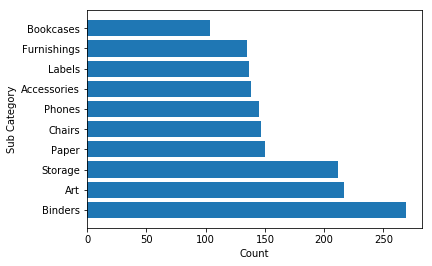

In [255]:
x4=ctop10['Sub.Category']
y4=ctop10['count']
plt.barh(x4,y4)
plt.xlabel('Count')
plt.ylabel('Sub Category')
plt.show()